# Burning Glass Job Skill Analysis
The 2nd and final part of my AI research in exloring the growth and STEM, specifically data science jobs in the U.S. Market. Description of my process to be updated later.

Author: Joshua Hizgiaev

Subject: Research

In [1]:
# Add standard data science pacakges
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# load google drive with excel sheet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Source of Data
All data was from the Lightcast-Burning Glass Database

Sample size: 13327000 rows
# How was this data gathered?
I ran 4 SQL queries to gather data on the skills table. The skills table is organized in the following way:
- job_id: This is a unique numerical ID assigned to a job, my SQL query did not gather this however it will still relevant later on when I move onto using PyTorch for skill prediction.
- jobdate: Formatting in Y-M-D, this represents the date that the job posting was listed and made avaliable to the public.
- skill: The specific skill required to do this task
- skillcluster: This represents the general cluster that skill is in, for example, if the specific skill is Machine Learning, then the skill cluster would be under Artificial Intelligence.
- skillclusterfamily: An even general cluster that encapsulates both the skill and skill cluster, for example the skill is Machine Learning, the skill cluster would be Artifical Intelligence, and the skill cluster family it belongs to is under Analysis.
## Datasets used for this analysis:
- Health Care dataset: About 1.3 million rows of lightcast data converted to a CSV that is for the Health Care cluster family
- Information Tech dataset: 1.8 million rows of lightcast data converted to a CSV file that is for the Information Technology cluster family
- Analysis Dataset: About 155 thousand rows of lightcast data converted to a CSV file that is for the Analysis/Data Science cluster family
- Finance Dataset: About **INSERT_COUNT_HERE** rows of lightcast data converted to a CSV file that is for the Finance cluster family

In [4]:
info_tech_path = '/content/drive/MyDrive/Data/Burning Glass/Data Sets/skill_data_info_tech.csv'
df_it = pd.read_csv(info_tech_path,index_col=[0])
print(df_it.shape)
df_it

(1889308, 4)


,jobdate,skill,skillcluster,skillclusterfamily
0,2007-01-10,Hardware and Software Configuration,System Design and Implementation,Information Technology
1,2007-01-10,Technical Support,Technical Support,Information Technology
2,2007-01-10,Simple Network Management Protocol (SNMP),Network Protocols,Information Technology
3,2007-01-10,PERL Scripting Language,Scripting Languages,Information Technology
4,2007-01-10,Software Systems,System Design and Implementation,Information Technology
...,...,...,...,...
1889303,2021-05-31,Information Systems Management,IT Management,Information Technology
1889304,2021-05-31,Information Systems,Management Information System (MIS),Information Technology
1889305,2021-05-31,Microsoft Office,Microsoft Office and Productivity Tools,Information Technology
1889306,2021-05-31,Network Hardware/Software Maintenance,Technical Support,Information Technology


In [5]:
health_path = '/content/drive/MyDrive/Data/Burning Glass/Data Sets/skill_data_health_care.csv'
df_hc = pd.read_csv(health_path,index_col=[0])
print(df_hc.shape)
df_hc

(1277186, 4)


,jobdate,skill,skillcluster,skillclusterfamily
0,2007-01-29,Occupational Therapy,Rehab Therapy,Health Care
1,2007-01-29,Medical Imaging,Radiology,Health Care
2,2007-01-29,Radiology,Radiology,Health Care
3,2007-01-29,Therapy,Rehab Therapy,Health Care
4,2007-01-29,Speech Language Pathology,Speech Language Pathology,Health Care
...,...,...,...,...
1277181,2021-05-31,Care Planning,Advanced Patient Care,Health Care
1277182,2021-05-31,Case Management,Advanced Patient Care,Health Care
1277183,2021-05-31,Crisis Intervention,Mental Health Therapies,Health Care
1277184,2021-05-31,Caregiving,Basic Living Activities Support,Health Care


In [6]:
data_path = '/content/drive/MyDrive/Data/Burning Glass/Data Sets/data_csv.csv'
df_ds = pd.read_csv(data_path, index_col=[0])
print(df_ds.shape)
df_ds

(156883, 4)


,jobdate,skill,skillcluster,skillclusterfamily
0,1/6/07,Data Collection,Data Techniques,Analysis
1,1/18/07,Data Analysis,Data Analysis,Analysis
2,1/31/07,Data Collection,Data Techniques,Analysis
3,1/29/07,BRIO,Business Intelligence Software,Analysis
4,1/6/07,Data Documentation,Data Techniques,Analysis
...,...,...,...,...
156878,5/31/21,Business Intelligence Reporting,Business Intelligence,Analysis
156879,5/31/21,Data Analysis,Data Analysis,Analysis
156880,5/31/21,Business Intelligence,Business Intelligence,Analysis
156881,5/31/21,Data Collection,Data Techniques,Analysis


# Cummulative Frequency Analysis
The following will be multiple cummulative frequency analysis on the 4 datasets I have, followed by a comparison analysis between all 4 cluster families, recording the rates of changes (derivatives) and then moving on to a PyTorch prediction model.

In [7]:
# Put dataframe tables in time series

# IT index
df_it.set_index('jobdate', inplace=True)
df_it.index = pd.to_datetime(df_it.index)
df_it = df_it.sort_index()
# Health Care Index
df_hc.set_index('jobdate',inplace=True)
df_hc.index = pd.to_datetime(df_hc.index)
df_hc = df_hc.sort_index()
# Data Science Index
df_ds.set_index('jobdate',inplace=True)
df_ds.index=pd.to_datetime(df_ds.index)
df_ds = df_ds.sort_index()
df_ds

,skill,skillcluster,skillclusterfamily
jobdate,,,
2007-01-01,TIBCO,Business Intelligence,Analysis
2007-01-01,MATLAB,Mathematical Software,Analysis
2007-01-01,Ad Hoc Reporting,Ad Hoc Analysis and Reporting,Analysis
2007-01-01,Data Mining,Data Mining,Analysis
2007-01-01,Data Analysis,Data Analysis,Analysis
...,...,...,...
2021-05-31,Machine Learning,Machine Learning,Analysis
2021-05-31,Pipeline (Computing),Data Techniques,Analysis
2021-05-31,Data Collection,Data Techniques,Analysis


In [8]:
# Lets now get all unique cluster families and skill clusters for each dataset

# Info tech:
it_skill_clusters = df_it['skillcluster'].unique()
it_skills = df_it['skill'].unique()
# Health care
hc_skill_clusters = df_hc['skillcluster'].unique()
hc_skills = df_hc['skill'].unique()
# Data science
ds_skill_clusters = df_ds['skillcluster'].unique()
ds_skills = df_ds['skill'].unique()
print(it_skill_clusters)

['Java' 'Microsoft Office and Productivity Tools' 'Technical Support'
 'Network Configuration' 'SQL Databases and Programming'
 'Operating Systems' 'C and C++' 'Data Warehousing' 'Oracle'
 'Cybersecurity' 'Software Development Principles'
 'Database Administration' 'Microsoft Development Tools'
 'Network Protocols' 'System Design and Implementation' 'Middleware'
 'Enterprise Resource Planning (ERP)' 'Scripting Languages'
 'Mainframe Technologies' 'Data Management' 'Test Automation'
 'Geographic Information System (GIS) Software' 'Telecommunications'
 'Basic Computer Knowledge' 'JavaScript and jQuery' 'Microsoft Windows'
 'Web Servers' 'Web Development' 'Extensible Languages'
 'Software Quality Assurance' 'Web Design' 'Systems Administration'
 'Cloud Solutions' 'Project Management Software' 'General Networking'
 'Programming Principles' 'Integrated Development Environments (IDEs)'
 'Help Desk Support' 'Management Information System (MIS)'
 'Software Development Methodologies' 'Virtual M

## Analyzing the Data Science dataset

I will perform standard frequency analysis, I will record the total number of skill and skill clusters, then I will make dataframes of the growth of both, then I will focus on specific skills important for this study, that being various skills and clusters:

1. Clusters:
  - NLP cluster
  - Data Science
  - Machine Learning
  - Data mining
2. Skills:
  - Natural Language Processing
  - Machine Learning
  - Chatbot
  - Data Mining
  - Data Science
  - Quantitative Data Analysis
  - Big Data Analytics
  - Predictive Models
  - Word2Vec
  - Deep Learning
  - Natural Language Toolkit (NLTK)
  - OpenNLP
  - Pandas

More to be added if needed

In [33]:
# Create a dataframe on the frequency of data science skills per month
# meaning that each row will contain the total frequency each month, machine learning in march 2021 is 50, then it will be 50
def create_frequency_table(dataset : pd.DataFrame, column_name='skill')->pd.DataFrame:
  freq_ds_skill = dataset.copy()
  freq_ds_skill['year'] = freq_ds_skill.index.year.astype(str)
  freq_ds_skill['month'] = freq_ds_skill.index.month
  freq_ds_skill['month'] = freq_ds_skill['month'].apply(lambda x: str(x).zfill(2))
  freq_ds_skill['Date'] = freq_ds_skill['year'] + '-' + freq_ds_skill['month']
  freq_ds_skill = freq_ds_skill.groupby(['Date',column_name]).size().reset_index(name='counts')
  freq_ds_skill.set_index(['Date'],inplace=True)
  freq_ds_skill.index = pd.to_datetime(freq_ds_skill.index,format='%Y-%m')
  freq_ds_skill = freq_ds_skill.sort_index()
  return freq_ds_skill

freq_it = create_frequency_table(df_it)
freq_ds = create_frequency_table(df_ds)
freq_hc = create_frequency_table(df_hc)
freq_ds['skill'].unique()

array(['Ad Hoc Analysis', 'Ad Hoc Reporting', 'Algebra',
       'Analytic Functions', 'BI architecture', 'BRIO',
       'Business Intelligence', 'Business Intelligence Reporting',
       'Business Metrics', 'CA-7', 'Cognos Impromptu', 'Crystal Reports',
       'Data Analysis', 'Data Capture', 'Data Collection',
       'Data Conversion', 'Data Documentation', 'Data Evaluation',
       'Data Manipulation', 'Data Mining', 'Data Quality Assessment',
       'Data Validation', 'Data Verification', 'Data Visualization',
       'Decision Support Systems', 'E-Views',
       'Generalized Linear Model (GLM)', 'Geometry', 'MATLAB',
       'Metadata Design', 'Microstrategy', 'Minitab', 'MoSes',
       'Model Building', 'Operational Qualification (OQ)', 'Oracle 11I',
       'Oracle Discoverer', 'Oracle Hyperion Essbase',
       'Oracle Manufacturing', 'Oracle Reports', 'Predictive Models',
       'Quantitative Analysis', 'Quantitative Data Analysis', 'R',
       'Requirements Verification and Valida

In [10]:
# create frequency tables of skillcluster families
freq_ds_fam = create_frequency_table(dataset = df_ds, column_name='skillcluster')
freq_hc_fam = create_frequency_table(dataset = df_hc, column_name='skillcluster')
freq_it_fam = create_frequency_table(dataset = df_it, column_name='skillcluster')
print(freq_ds_fam['skillcluster'].unique())

['Ad Hoc Analysis and Reporting' 'Business Intelligence'
 'Business Intelligence Software' 'Data Analysis' 'Data Mining'
 'Data Science' 'Data Techniques' 'Data Visualization'
 'Mathematical Modeling' 'Mathematical Software' 'Mathematics'
 'Natural Language Processing (NLP)' 'Statistical Software' 'Statistics'
 'Validation' 'Machine Learning' 'Behavior Analysis' 'Image Analysis'
 'Plotting Software' 'Spatial Data Analysis']


Show top 30 most common skills among Data Science Jobs

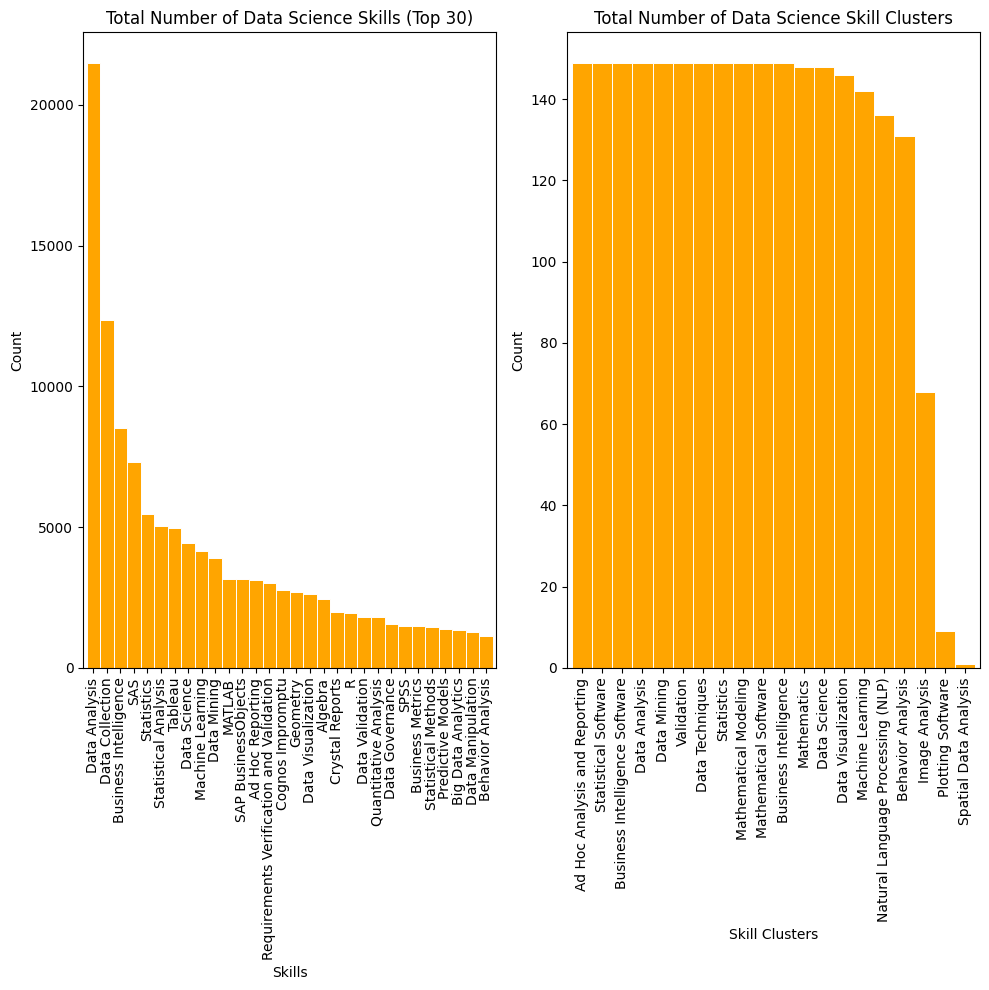

In [11]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
df_ds['skill'].value_counts()[:30].plot.bar(color='orange',width=1, edgecolor="white", linewidth=0.7,title='Total Number of Data Science Skills (Top 30)',xlabel='Skills',ylabel='Count',ax=ax[0])
freq_ds_fam['skillcluster'].value_counts().plot.bar(color='orange',width=1, edgecolor="white", linewidth=0.7,title='Total Number of Data Science Skill Clusters',xlabel='Skill Clusters',ylabel='Count',ax=ax[1])
plt.tight_layout()
plt.show()

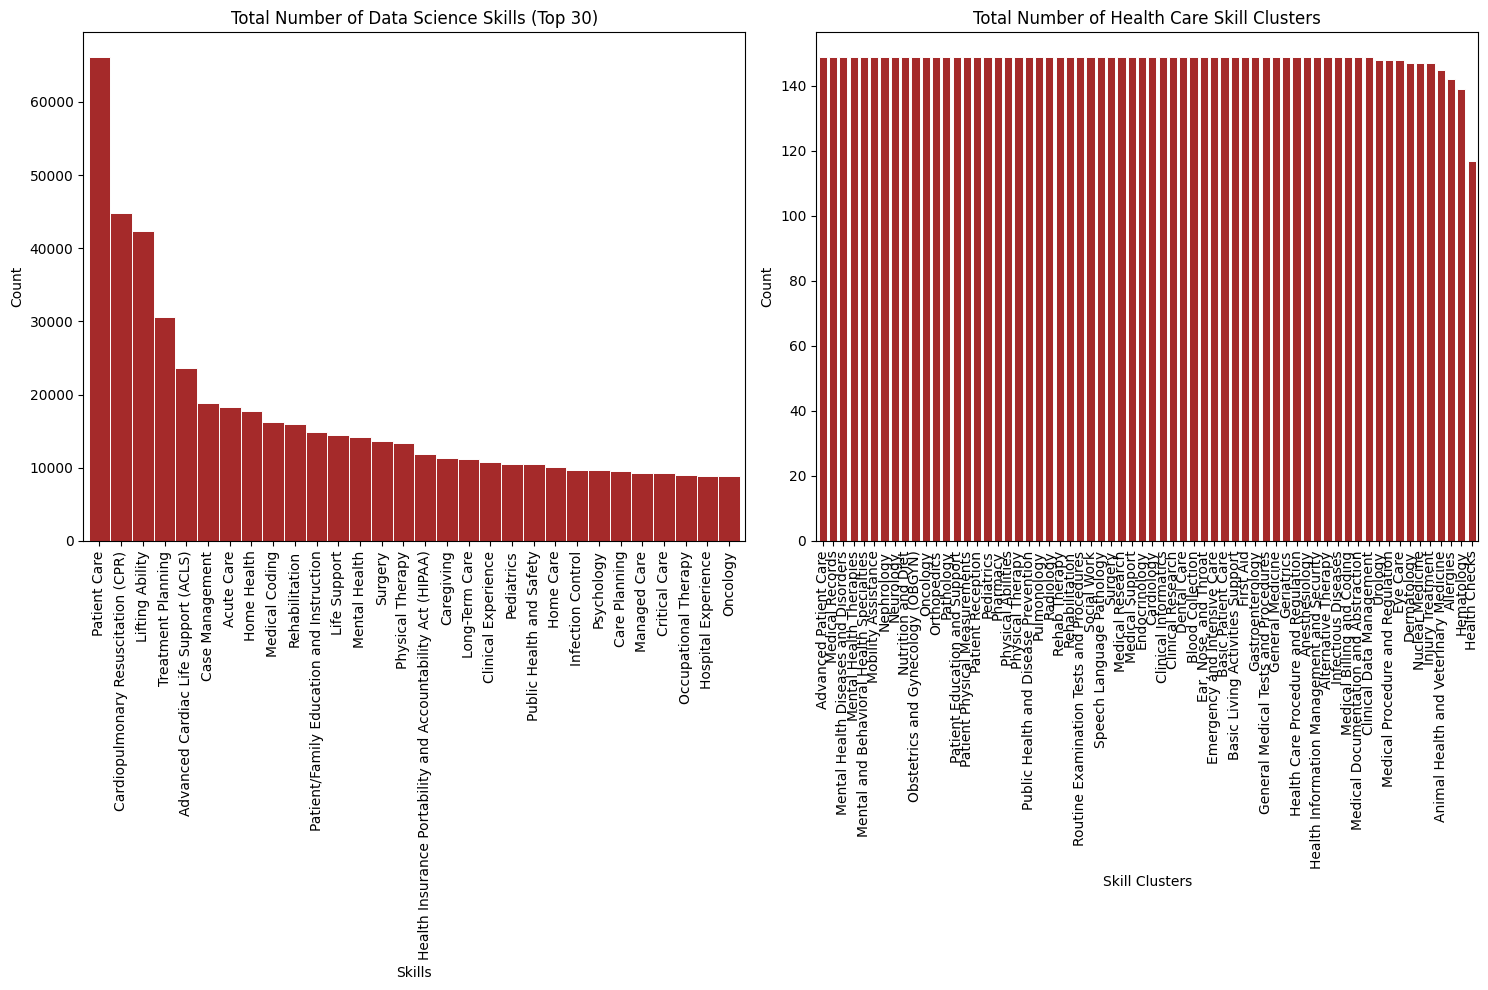

In [12]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
df_hc['skill'].value_counts()[:30].plot.bar(color='brown',width=1, edgecolor="white", linewidth=0.7,title='Total Number of Data Science Skills (Top 30)',xlabel='Skills',ylabel='Count',ax=ax[0])
freq_hc_fam['skillcluster'].value_counts().plot.bar(color='brown',width=0.8, edgecolor="white", linewidth=0.7,title='Total Number of Health Care Skill Clusters',xlabel='Skill Clusters',ylabel='Count',ax=ax[1])
plt.tight_layout()
plt.show()

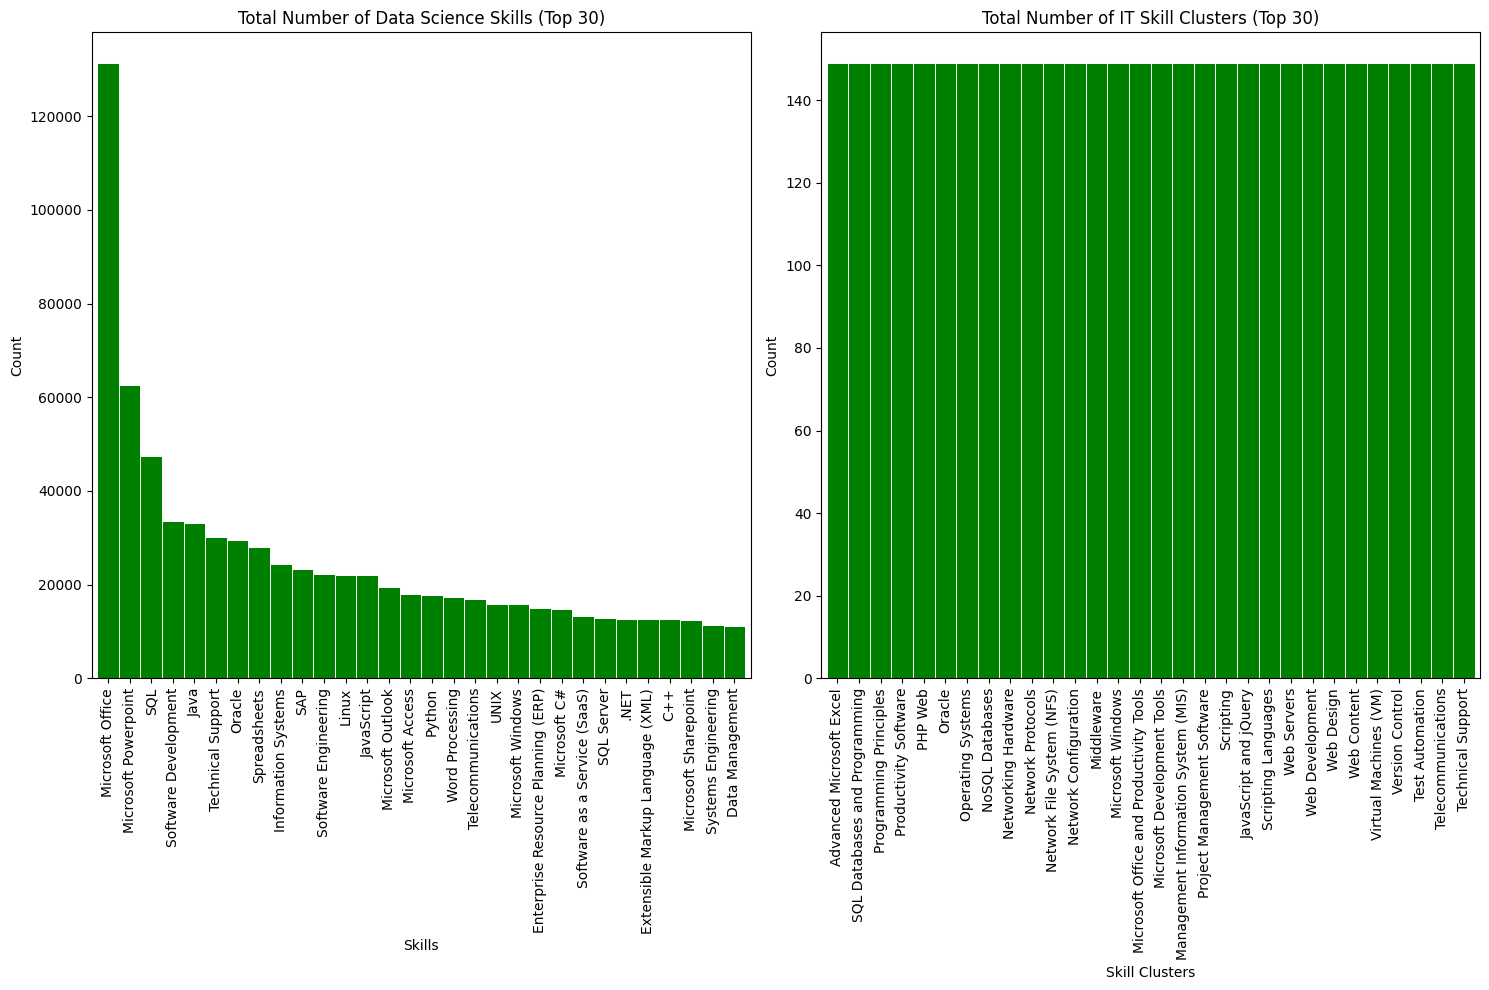

In [13]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
df_it['skill'].value_counts()[:30].plot.bar(color='green',width=1, edgecolor="white", linewidth=0.7,title='Total Number of Data Science Skills (Top 30)',xlabel='Skills',ylabel='Count',ax=ax[0])
freq_it_fam['skillcluster'].value_counts()[:30].plot.bar(color='green',width=1, edgecolor="white", linewidth=0.7,title='Total Number of IT Skill Clusters (Top 30)',xlabel='Skill Clusters',ylabel='Count',ax=ax[1])
plt.tight_layout()
plt.show()

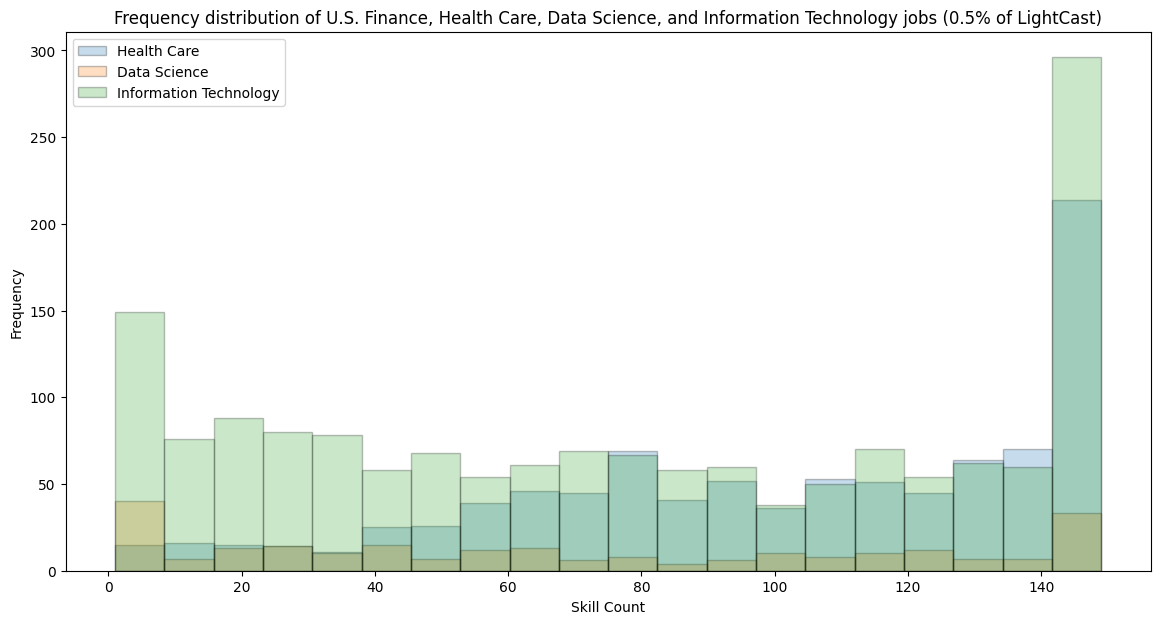

In [14]:
def create_histograms(dataframes, bins):
    labels = ['Health Care','Data Science','Information Technology']
    plt.figure(figsize=(14,7))
    plt.title('Frequency distribution of U.S. Finance, Health Care, Data Science, and Information Technology jobs (0.5% of LightCast)')
    plt.xlabel('Skill Count')
    plt.ylabel('Frequency')

    for index,df in enumerate(dataframes):
      x = df['skill'].value_counts()
      plt.hist(x, bins = bins,alpha=0.25,label=labels[index],edgecolor='k')

    plt.legend()
    plt.show()

df_list = [freq_hc,freq_ds,freq_it]
create_histograms(df_list,20)

### Creating plots for key data science skills we want to compare and take record Both annual and monthly:

<Figure size 500x1000 with 0 Axes>

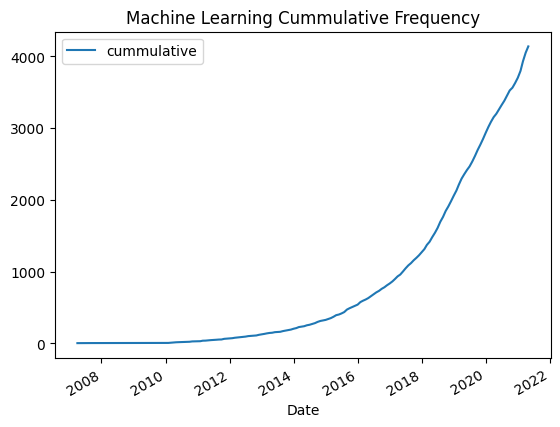

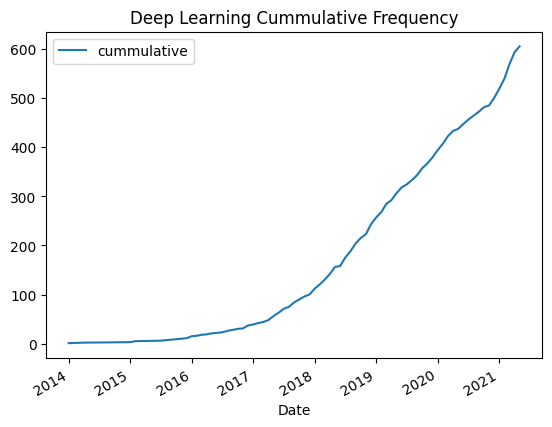

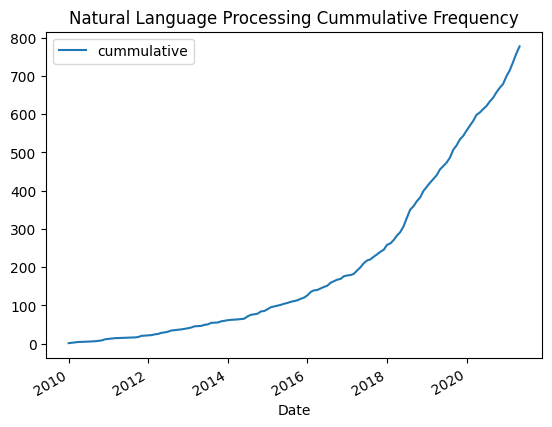

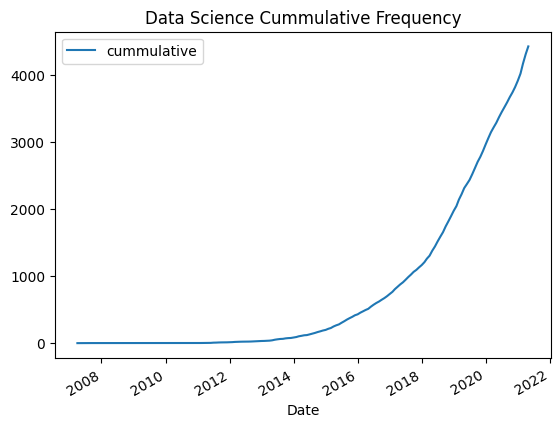

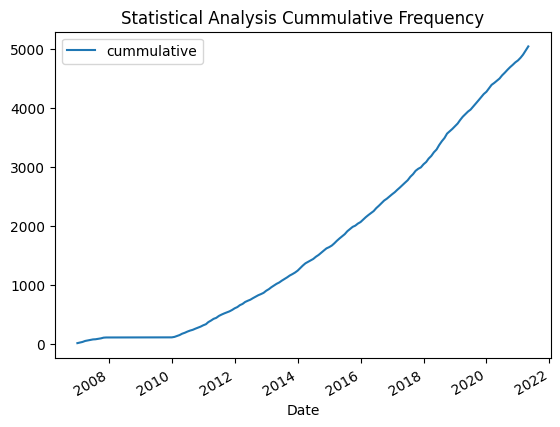

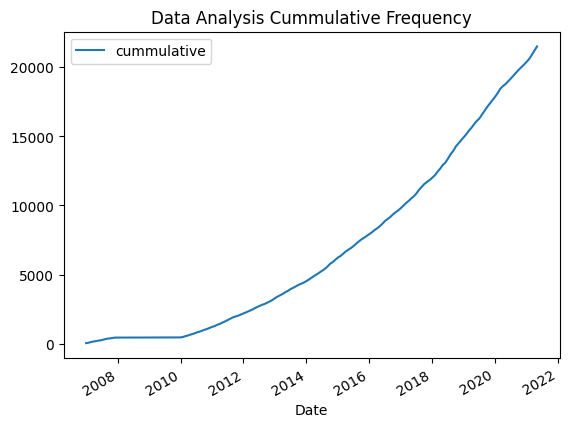

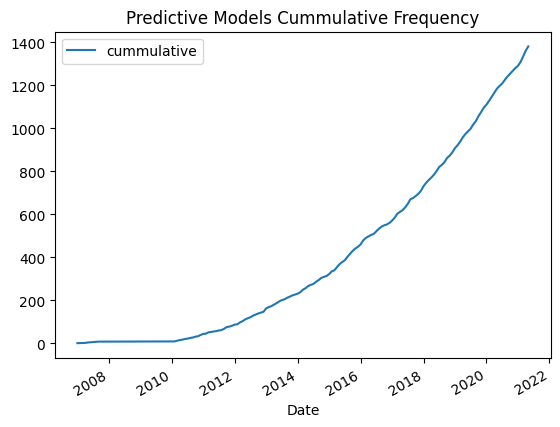

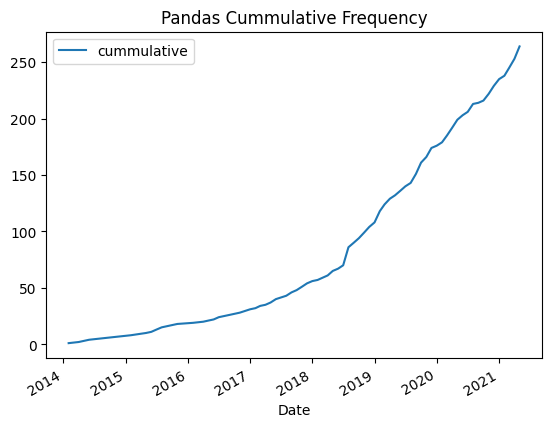

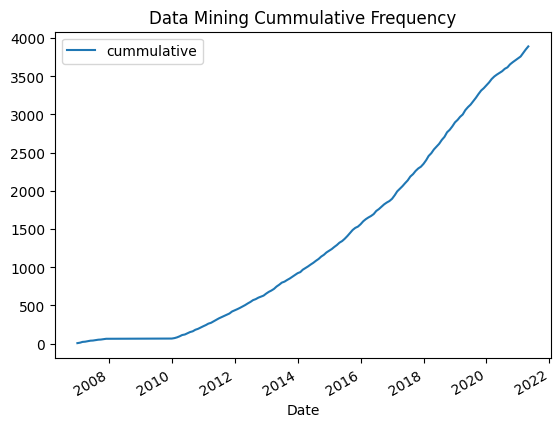

In [15]:
# Monthly Frequency

skill_list = ['Machine Learning','Deep Learning','Natural Language Processing','Data Science','Statistical Analysis','Data Analysis','Predictive Models','Pandas','Data Mining']
plt.figure(figsize=(5,10))

for i in range(len(skill_list)):
  cummulative_df = freq_ds.loc[freq_ds['skill'] == skill_list[i]].drop(['skill'],axis=1)
  cummulative_df['cummulative'] = cummulative_df['counts'].cumsum()
  cummulative_df = cummulative_df.drop(['counts'],axis=1)
  cummulative_df.plot(title='{} Cummulative Frequency'.format(skill_list[i]))

plt.show()

<Figure size 500x1000 with 0 Axes>

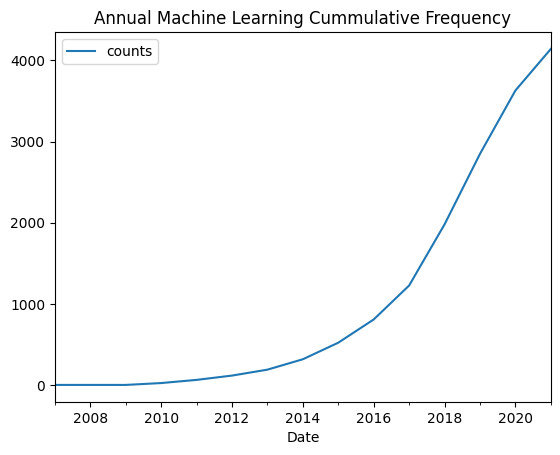

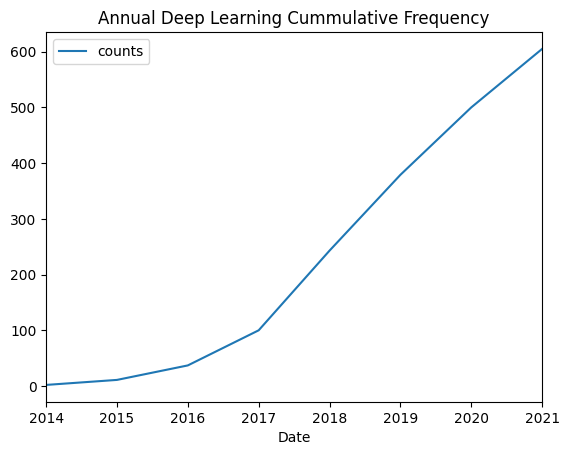

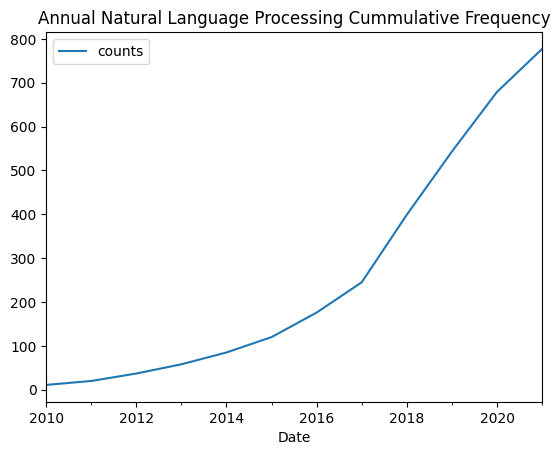

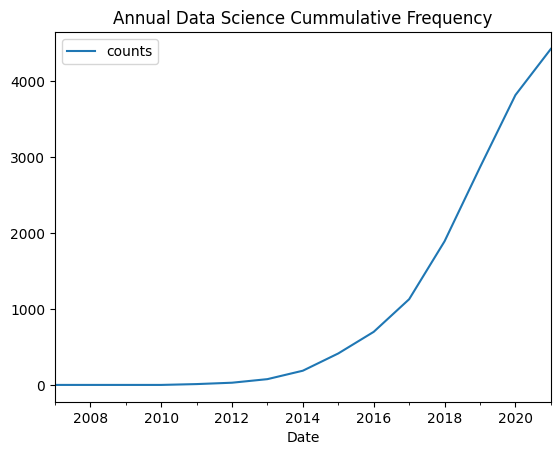

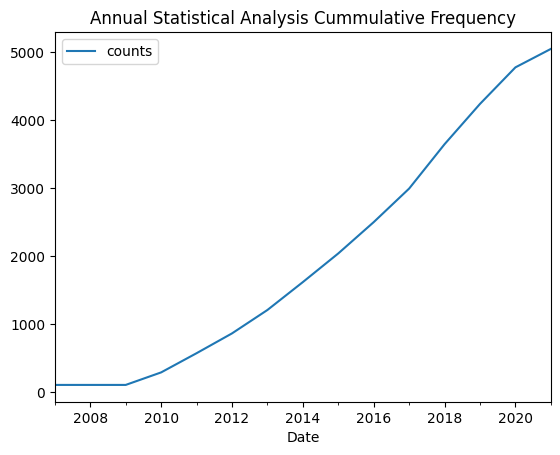

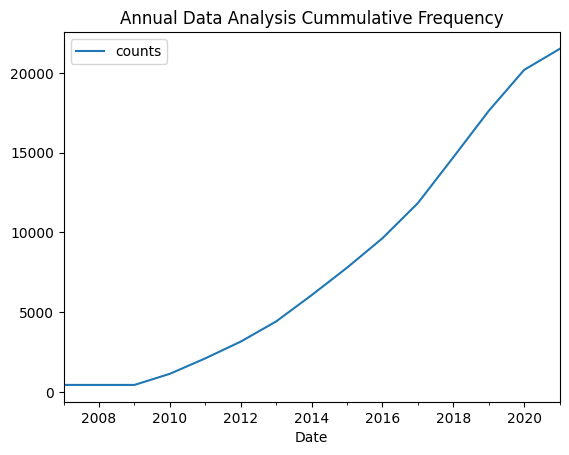

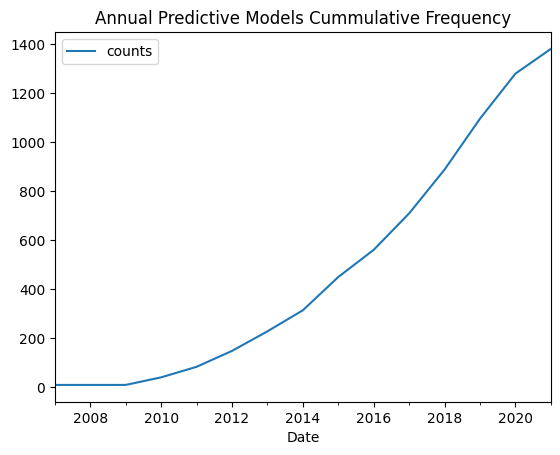

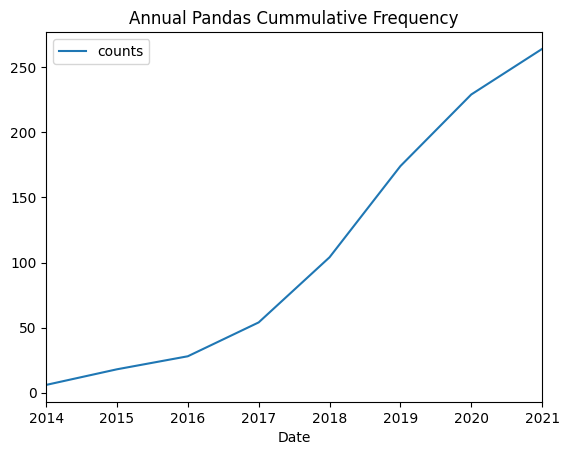

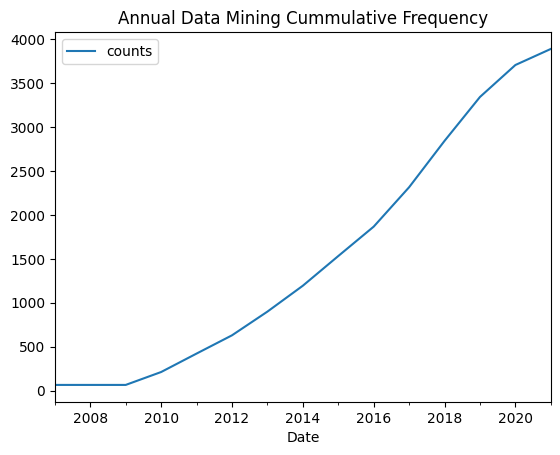

In [16]:
# Yearly cummulative frequency of key data science skills
plt.figure(figsize=(5,10))

for i in range(len(skill_list)):
  cummulative_df = freq_ds.loc[freq_ds['skill'] == skill_list[i]].drop(['skill'],axis=1)
  yearly_df = cummulative_df.resample('Y').sum()
  yearly_df['counts'] = yearly_df['counts'].cumsum()
  yearly_df.plot(title='Annual {} Cummulative Frequency'.format(skill_list[i]))

plt.show()

### Descriptive Statistics (Annual and Monthly Frequency)
I will be recording the following descriptive statistics:
- Mean
- Median
- Mode
- Standard Deviation
- Min
- Max


In [17]:
from scipy import stats
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

def descriptive_stats(skills:list, df:pd.DataFrame):

  monthly_stat_df = pd.DataFrame(columns=['Skill','Mean','Median','Mode','Standard Deviation','Min','Max'])

  for i in range(len(skills)):
  # Calculate stats:
    skill_df = df[df['skill'] == skills[i]]
    mean = skill_df['counts'].mean()
    median = skill_df['counts'].median()
    mode = stats.mode(skill_df['counts'])
    std = skill_df['counts'].std()
    min = skill_df['counts'].min()
    max = skill_df['counts'].max()
    row = {'Skill':skills[i],'Mean':mean,'Median':median,'Mode':mode,'Standard Deviation':std,'Min':min,'Max':max}
    monthly_stat_df = pd.concat([monthly_stat_df,pd.DataFrame.from_records([row])],ignore_index=True)

  return monthly_stat_df

monthly_stat_ds = descriptive_stats(skills=freq_ds['skill'].unique(),df=freq_ds)
monthly_stat_hc = descriptive_stats(skills=freq_hc['skill'].unique(), df=freq_hc)
monthly_stat_it = descriptive_stats(skills=freq_it['skill'].unique(), df=freq_it)
monthly_stat_ds

,Skill,Mean,Median,Mode,Standard Deviation,Min,Max
0,Ad Hoc Analysis,5.944828,6.0,"([5], [21])",3.259131,1,20
1,Ad Hoc Reporting,20.993289,18.0,"([18], [9])",11.994084,1,59
2,Algebra,16.564626,16.0,"([13], [9])",8.882851,1,43
3,Analytic Functions,1.760000,1.0,"([1], [52])",0.985962,1,5
4,BI architecture,2.114035,2.0,"([2], [45])",1.173142,1,6
...,...,...,...,...,...,...,...
237,SEMMA,1.000000,1.0,"([1], [2])",0.000000,1,1
238,EBBP,1.000000,1.0,"([1], [1])",NaN,1,1
239,Lexical Semantics,1.000000,1.0,"([1], [1])",NaN,1,1
240,PSPP,1.000000,1.0,"([1], [1])",NaN,1,1


# Recording the monthly and annual rate of change
This is essentially our results for our data science dataframe, along with descriptive statistics and statistical test.

The following skills and clusters will be recorded annually and monthly:
1. Clusters:
  - NLP cluster
  - Data Science
  - Machine Learning
  - Data mining
2. Skills:
  - Natural Language Processing
  - Machine Learning
  - Data Mining
  - Data Science
  - Big Data Analytics
  - Predictive Models
  - Deep Learning
  - Pandas

In [34]:
pd.options.mode.chained_assignment = None  # default='warn'

# Clusters (Monthly):
df_dict_cluster_m={'Machine Learning':freq_ds_fam[freq_ds_fam['skillcluster']=='Machine Learning'],
                 'Data Analysis':freq_ds_fam[freq_ds_fam['skillcluster']=='Data Analysis'],
                 'Data Science':freq_ds_fam[freq_ds_fam['skillcluster']=='Data Science'],
                 'Natural Language Processing (NLP)':freq_ds_fam[freq_ds_fam['skillcluster']=='Natural Language Processing (NLP)']
                 }
# Skills (Monthly)
df_dict_skill_m={'Machine Learning':freq_ds[freq_ds['skill']=='Machine Learning'],
                 'Data Analysis':freq_ds[freq_ds['skill']=='Data Analysis'],
                 'Natural Language Processing':freq_ds[freq_ds['skill']=='Natural Language Processing'],
                 'Deep Learning':freq_ds[freq_ds['skill']=='Deep Learning'],
                 'Pandas':freq_ds[freq_ds['skill']=='Pandas'],
                 'Predictive Models':freq_ds[freq_ds['skill']=='Predictive Models'],
                 'Data Mining':freq_ds[freq_ds['skill']=='Data Mining']
                 }

# Statically change dataframe variables
def make_dictionary_monthly(df_dict):
  for cluster in df_dict.values():
    cluster['ROC'] = cluster['counts'].pct_change()
    cluster['Cumulative Percent'] = 100 * (cluster['counts'].cumsum() / cluster['counts'].sum())
    cluster['Cumulative Sum'] = cluster['counts'].cumsum()

make_dictionary_monthly(df_dict_cluster_m)
make_dictionary_monthly(df_dict_skill_m)

df_dict_skill_m['Machine Learning']

,skill,counts,ROC,Cumulative Percent,Cumulative Sum
Date,,,,,
2007-04-01,Machine Learning,2,NaN,0.048309,2
2007-09-01,Machine Learning,1,-0.500000,0.072464,3
2010-02-01,Machine Learning,2,1.000000,0.120773,5
2010-03-01,Machine Learning,3,0.500000,0.193237,8
2010-04-01,Machine Learning,3,0.000000,0.265700,11
...,...,...,...,...,...
2021-01-01,Machine Learning,74,0.156250,89.420290,3702
2021-02-01,Machine Learning,96,0.297297,91.739130,3798
2021-03-01,Machine Learning,134,0.395833,94.975845,3932


In [41]:
# Clusters (Yearly):
df_dict_cluster_y={'Machine Learning':freq_ds_fam[freq_ds_fam['skillcluster']=='Machine Learning'].resample('Y').sum(),
                 'Data Analysis':freq_ds_fam[freq_ds_fam['skillcluster']=='Data Analysis'].resample('Y').sum(),
                 'Data Science':freq_ds_fam[freq_ds_fam['skillcluster']=='Data Science'].resample('Y').sum(),
                 'Natural Language Processing (NLP)':freq_ds_fam[freq_ds_fam['skillcluster']=='Natural Language Processing (NLP)'].resample('Y').sum()
                 }
# Skills (Yearly)
df_dict_skill_y={'Machine Learning':freq_ds[freq_ds['skill']=='Machine Learning'].resample('Y').sum(),
                 'Data Analysis':freq_ds[freq_ds['skill']=='Data Analysis'].resample('Y').sum(),
                 'Natural Language Processing':freq_ds[freq_ds['skill']=='Natural Language Processing'].resample('Y').sum(),
                 'Deep Learning':freq_ds[freq_ds['skill']=='Deep Learning'].resample('Y').sum(),
                 'Business Intelligence':freq_ds[freq_ds['skill']=='Business Intelligence'].resample('Y').sum(),
                 'Predictive Models':freq_ds[freq_ds['skill']=='Predictive Models'].resample('Y').sum(),
                 'Data Mining':freq_ds[freq_ds['skill']=='Data Mining'].resample('Y').sum(),
                 'SAS':freq_ds[freq_ds['skill']=='SAS'].resample('Y').sum()
                 }

def make_dictionary_yearly(df_dict):
  for val in df_dict.values():
    val['ROC'] = val['counts'].pct_change()
    val['Cumulative Percent'] = 100 * (val['counts'].cumsum() / val['counts'].sum())
    val['Cumulative Sum'] = val['counts'].cumsum()

make_dictionary_yearly(df_dict_skill_y)
make_dictionary_yearly(df_dict_cluster_y)
df_dict_skill_y['Deep Learning']

,counts,ROC,Cumulative Percent,Cumulative Sum
Date,,,,
2014-12-31,2,NaN,0.330579,2
2015-12-31,9,3.500000,1.818182,11
2016-12-31,26,1.888889,6.115702,37
2017-12-31,63,1.423077,16.528926,100
2018-12-31,143,1.269841,40.165289,243
2019-12-31,136,-0.048951,62.644628,379
2020-12-31,121,-0.110294,82.644628,500
2021-12-31,105,-0.132231,100.000000,605


### Generate CSV files for our derivatives both monthly and annually for clusters and specific skills

In [ ]:
def generate_results(df_dict)
  derivatives = {}
  for item in df_dict.keys():
    data = df_dict[item]['ROC']
    year = df_dict[item]['Date']
    derivatives[item] = pd.Series(data=data.values, index=year.values,name='Date')

  derivative_df = pd.DataFrame.from_dict(derivatives, orient='columns')

  # Sort columns (years) in ascending order
  derivative_df = derivative_df.reindex(sorted(derivative_df.columns), axis=1)

  # Fill missing values with 'na'
  derivative_df = derivative_df.fillna("Not Recorded")
  return derivative_df


# Moving on, skill prediction with PyTorch!
Its time to move on to the final piece of this analysis which is prediction using the PyTorch library wit LightCasts job ad data. Each skill was assigned based on a unique job id that corresponds to a unique job offer. Meaning that some text processing is needed and some very tricky dataframe manipulation. Here is the following preprocessing and data gathering steps:
1. Getting Data
  * I will perform an unbiased SQL query on 1% of LightCasts 'jobtext' table, this contains the job ads and unique job id's, I will perform the same for skills
  * Use pandas to create a new dataframe that has skills matched with its job ad using the identical job id's
  * create a convolutional neural network and split the data into 70:30 Train Test
  * Wait a very long time
  * Turn my results into a CSV
  * Profit